In [1]:
import numpy as np
import pandas as pd

import pandas_datareader.data as web
import datetime  
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import YouTubeVideo

# Course 2: Classification. Features. Logistic Regression. Bias and Variance.

<img src="images/machine_learning.jpg" width="600">

Let's read Ethereum price from Yahoo! Finance

In [2]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 2, 23)
df = web.DataReader("ETH-USD", 'yahoo', start, end)

In [3]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,692.989990,746.619995,686.440002,741.130005,741.130005,259822610
2018-01-01,741.090027,765.299988,724.330017,756.200012,756.200012,256171569
2018-01-02,756.169983,882.609985,756.169983,861.969971,861.969971,949013949


We are not interested in the price itself, but in price variation. Let's compute the __Return__

In [4]:
df['Return'] = np.log(df['Close'] / df['Close'].shift(1))

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-12-31,692.989990,746.619995,686.440002,741.130005,741.130005,259822610,NaN
2018-01-01,741.090027,765.299988,724.330017,756.200012,756.200012,256171569,0.020130
2018-01-02,756.169983,882.609985,756.169983,861.969971,861.969971,949013949,0.130915
2018-01-03,861.969971,951.700012,847.900024,941.099976,941.099976,778108786,0.087829
2018-01-04,941.000000,997.440002,901.030029,944.830017,944.830017,780050914,0.003956


Remarks:
* One day variation is not relevant.
* pd.series 
* features
* moving average


In [6]:
df['2d'] = pd.Series.rolling(df['Return'],window = 2).mean()
df['5d'] = pd.Series.rolling(df['Return'],window = 5).mean()
df = df.iloc[1:,:]

In [7]:
df['sign'] = df['Return'].map(lambda x: int(np.sign(x)))

In [8]:
df.head(12)

,Open,High,Low,Close,Adj Close,Volume,Return,2d,5d,sign
Date,,,,,,,,,,
2018-01-01,741.090027,765.299988,724.330017,756.200012,756.200012,256171569,0.020130,NaN,NaN,1
2018-01-02,756.169983,882.609985,756.169983,861.969971,861.969971,949013949,0.130915,0.075522,NaN,1
2018-01-03,861.969971,951.700012,847.900024,941.099976,941.099976,778108786,0.087829,0.109372,NaN,1
2018-01-04,941.000000,997.440002,901.030029,944.830017,944.830017,780050914,0.003956,0.045892,NaN,1
2018-01-05,944.830017,1018.369995,933.979980,967.130005,967.130005,808280779,0.023328,0.013642,0.053231,1
2018-01-06,967.130005,1010.169983,958.289978,1006.409973,1006.409973,381555969,0.039812,0.031570,0.057168,1
2018-01-07,1006.409973,1117.839966,1003.210022,1117.750000,1117.750000,602250144,0.104928,0.072370,0.051971,1
2018-01-08,1117.750000,1228.250000,967.840027,1136.109985,1136.109985,1292737991,0.016292,0.060610,0.037663,1
2018-01-09,1136.109985,1300.300049,1133.699951,1289.239990,1289.239990,986697724,0.126443,0.071368,0.062161,1


In [9]:
dataToUse = df.iloc[7:,7:]

In [10]:
dataToUse.head()

,2d,5d,sign
Date,,,
2018-01-08,0.060610,0.037663,1
2018-01-09,0.071368,0.062161,1
2018-01-10,0.047363,0.051152,-1
2018-01-11,-0.061811,0.024808,-1
2018-01-12,0.004797,0.024122,1


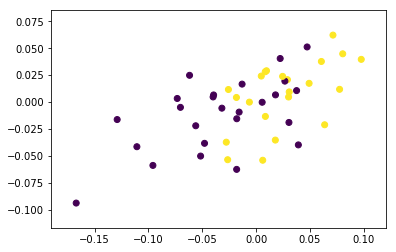

In [11]:
plt.scatter(x=dataToUse['2d'],y=dataToUse['5d'],c=dataToUse['sign'])
plt.show()

In [12]:
data = dataToUse.copy()

In [13]:
def toY(x):
    if x <0:
        z=0
    else:
        z =1
    return z
data['y'] = data['sign'].map(toY)
data.drop('sign',axis=1, inplace=True)

In [14]:
data.head()

,2d,5d,y
Date,,,
2018-01-08,0.060610,0.037663,1
2018-01-09,0.071368,0.062161,1
2018-01-10,0.047363,0.051152,0
2018-01-11,-0.061811,0.024808,0
2018-01-12,0.004797,0.024122,1


## 1. Hypothesis (model) 

$$h_\theta(x) = \sigma(z) = \frac{1}{1-e^{-z}}$$


Where $z = <\theta,x>$.
In our case, $z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 = [\theta_0, \theta_1,\theta_2][1,x_1,x_2]^T$

(Note that if u,v are vectors represented as column matrices, then we can compute the inner product as matrix multiplication $<u,v> = u^T \cdot v$)

## 2. Loss function

* Square loss is non-convex, therefore we will use the so called categorical crossentropy $ loss = - y \cdot \log(h_\theta(x)) - (1-y) \cdot \log(1 - h_\theta(x))$
* Information theory $-log(p(x_i))$
* Entropy
* Sigmoid and its purpose

Remember the importance of the graph of $-log(x)$ on the interval $[0,1]$. We will draw a plot, just to have it nearby when reasoning on the loss function, the so called __categorical crossentropy__

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


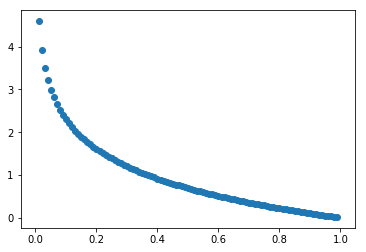

In [18]:
x = np.arange(0,1,0.01)
y = - np.log(x)
plt.scatter(x,y)

Also note that the loss function can also be written in a less condensed way, on two branches:
$$
loss =
\begin{cases}
-\log(h_\theta(x))\ , && y = 1 \cr
- \log (1-h_\theta(x))\ , && y =0
\end{cases}
$$


An excellent presentation on __entropy__ is the youtube video (on some browsers you might have to copy/paste the link):

In [15]:
YouTubeVideo('https://www.youtube.com/watch?v=9r7FIXEAGvs')

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Consider second degree $h_\theta(z) = \frac{1}{1 - e^z}$ and $z = <\theta,x> = \theta^T x = \theta_0 + \theta_1 x_1 + \theta_2 x_2$

In [23]:
def hyp(x, theta):
    return sigmoid(np.dot(x,theta))

### Gradient

In [24]:
# m denotes the number of examples here, not the number of features
def gradientDescent(X, y, theta, alpha, numIterations,printdetails): 
    m = len(y)
    for i in range(numIterations):
        loss = - y * np.log(hyp(X,theta)) - (1-y) * np.log(1-hyp(X,theta))
        cost = np.sum(loss) / (2 * m)
        if printdetails == True:
            if i %500 == 0:
                print("Iteration %d | Cost: %f" % (i, cost))
        gradient = np.dot(X.T, y - hyp(X,theta))
        # update
        theta = theta - alpha * gradient
    return theta

In [25]:
theta0_guess = -0.00383
theta1_guess= 0.176
theta2_guess= -0.045

x1 = data['2d']
x2 = data['5d']

In [26]:
theta = np.array([theta0_guess,theta1_guess,theta2_guess])
X = np.hstack([np.ones((len(x1),1)),np.array(x1).reshape(-1,1),np.array(x2).reshape(-1,1)])
y = data['y']
gradientDescent(X,y, theta, 0.00001, 2000,True)

Iteration 0 | Cost: 0.345336
Iteration 500 | Cost: 0.345481
Iteration 1000 | Cost: 0.345641
Iteration 1500 | Cost: 0.345818


array([ 0.02877345,  0.16231157, -0.04945863])

In [27]:
xp = np.arange(-0.2, 0.1,0.01)
yp = (-theta[0] - theta[1] * xp) / theta[2]

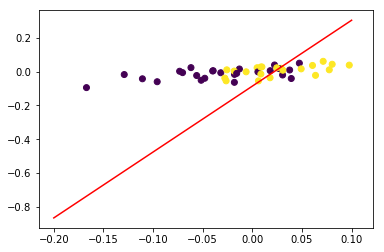

In [29]:
plt.scatter(x=dataToUse['2d'],y=dataToUse['5d'],c=dataToUse['sign'])
plt.plot(xp,yp,color='red')
plt.show()

## Second degree $x_1$ and $x_2$

In [30]:
X.shape

(47, 3)

In [31]:
X = np.hstack([X, X[:,1:]**2])

In [32]:
X.shape

(47, 5)

In [33]:
theta.shape

(3,)

In [34]:
theta = np.hstack([theta,theta[-2],theta[-1]])

In [35]:
gradientDescent(X,y, theta, 0.000001, 20000,True)

Iteration 0 | Cost: 0.345387
Iteration 500 | Cost: 0.345401
Iteration 1000 | Cost: 0.345415
Iteration 1500 | Cost: 0.345429
Iteration 2000 | Cost: 0.345444
Iteration 2500 | Cost: 0.345458
Iteration 3000 | Cost: 0.345473
Iteration 3500 | Cost: 0.345488
Iteration 4000 | Cost: 0.345503
Iteration 4500 | Cost: 0.345518
Iteration 5000 | Cost: 0.345533
Iteration 5500 | Cost: 0.345549
Iteration 6000 | Cost: 0.345564
Iteration 6500 | Cost: 0.345580
Iteration 7000 | Cost: 0.345596
Iteration 7500 | Cost: 0.345612
Iteration 8000 | Cost: 0.345628
Iteration 8500 | Cost: 0.345644
Iteration 9000 | Cost: 0.345661
Iteration 9500 | Cost: 0.345678
Iteration 10000 | Cost: 0.345695
Iteration 10500 | Cost: 0.345712
Iteration 11000 | Cost: 0.345729
Iteration 11500 | Cost: 0.345746
Iteration 12000 | Cost: 0.345764
Iteration 12500 | Cost: 0.345781
Iteration 13000 | Cost: 0.345799
Iteration 13500 | Cost: 0.345817
Iteration 14000 | Cost: 0.345836
Iteration 14500 | Cost: 0.345854
Iteration 15000 | Cost: 0.345873
I

array([ 0.02890595,  0.16230526, -0.04946098,  0.1765792 , -0.04490848])

Which is better? 
__Test set__

In [36]:
A = np.array([[1,2,3],[4,5,6]])

In [37]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [38]:
np.random.shuffle(A) #is performed inplace

In [39]:
A

array([[1, 2, 3],
       [4, 5, 6]])

random.split train 0.6, val (dev) 0.2, test 0,2

In [40]:
I = np.eye(X.shape[0])

In [41]:
np.random.shuffle(I)

In [42]:
X = np.dot(I,X)
y = np.dot(I,y)

In [43]:
l1 = int(0.6 * X.shape[0])
l2 = int((0.6 + 0.2) * X.shape[0])

In [44]:
X_train = X[:l1,:]
X_val = X[l1:l2,:]
X_test = X[l2:,:]

In [45]:
y_train = y[:l1]
y_val = y[l1:l2]
y_test = y[l2:]

In [46]:
def polyClass(X_train,X_val, lr,numIter,n):
    for i in range(n):
        X_train = np.hstack([X_train, X_train[:,1:2]**i])
        X_val = np.hstack([X_val, X_val[:,1:2]**i])
    thetaInit = np.ones(X_train.shape[1])
    thetaOut = gradientDescent(X_train,y_train, thetaInit, lr, numIter,False)   
    y_pred = sigmoid(np.dot(X_val, thetaOut))
    acc = np.sum(y_val == (y_pred > 0.5)) / y_val.shape[0] # number between 0 and 1
    return acc
        

In [47]:
polyClass(X_train,X_val, 0.000001,750000,2)

0.44444444444444442

In [48]:
polyClass(X_train,X_val, 0.000001,75000,3)

0.44444444444444442

In [49]:
polyClass(X_train,X_val, 0.000001,750000,1)

0.44444444444444442

## 3. Bias and Variance

<img src="images/Bias_Variance.png" width="600">

## Regularization

$$min(cost(\theta,x))$$ vs $$min(cost(\theta,x) + 1000 \theta_0 ^2)$$

($L^2-)$ regularization: $min(cost(\theta,x) + \lambda\sum \theta_i^2)$
where $lambda$ in called a regularization parameter. Usually $\lambda = 0.1, 0.001, 0.001$

Workflow:

* use a train\ development\ test split
* find the polynomial degree by measuring accuracy on the dev set
* find the optimal value of the regularization parameter on the test set